In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
import pandas_datareader.data as web

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
# pass all stock tickers for various stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()

In [9]:
start = datetime(end.year - 1, end.month, end.day)

In [11]:
# get stock info from yahoo finance
# set stock ticker as global value
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [12]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-28,162.000000,159.929993,160.139999,161.470001,25966000.0,159.064911
2017-08-29,163.119995,160.000000,160.100006,162.910004,29516900.0,160.483490
2017-08-30,163.889999,162.610001,163.800003,163.350006,27269600.0,160.916916
2017-08-31,164.520004,163.479996,163.639999,164.000000,26785100.0,161.557236
2017-09-01,164.940002,163.630005,164.800003,164.050003,16591100.0,161.606491


In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,177.903913,175.152174,176.450237,176.581621,2.969080e+07,175.130465
std,14.933326,15.013403,14.895389,15.039827,1.264243e+07,15.643826
min,151.830002,149.160004,149.990005,150.550003,1.251390e+07,148.307571
25%,168.619995,164.880005,166.639999,166.889999,2.077880e+07,165.260910
50%,175.250000,173.050003,174.169998,174.330002,2.613200e+07,172.350739
75%,188.000000,185.729996,186.779999,186.990005,3.502630e+07,186.216904
max,220.539993,218.919998,219.009995,219.699997,8.659380e+07,219.699997


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-08-28 to 2018-08-28
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


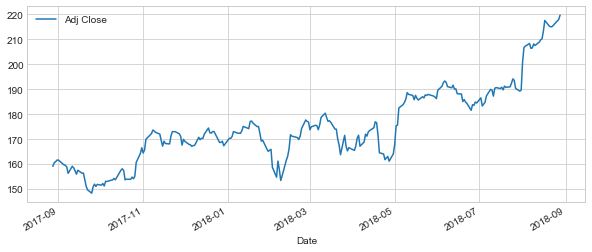

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

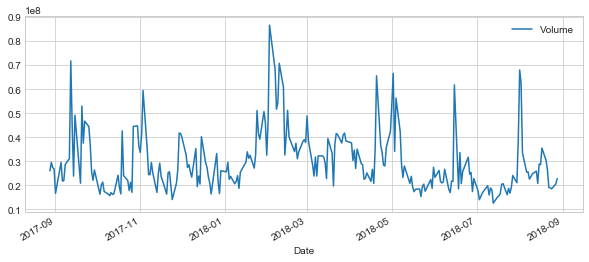

In [18]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

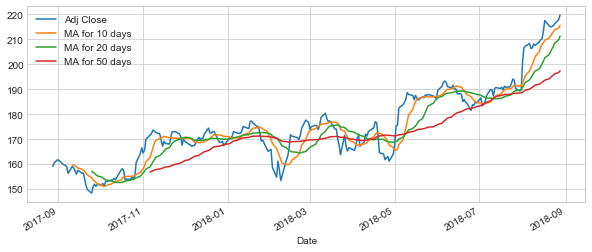

In [26]:
# moving average day
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    #AAPL[column_name]=DataFrame.rolling(AAPL['Adj Close'],ma).mean()
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],window=ma).mean()
    
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

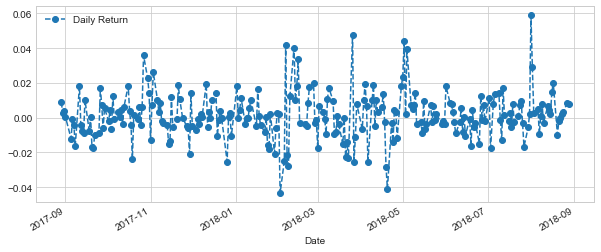

In [27]:
# AAPL daily return
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend = True, linestyle='--', marker='o') 

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


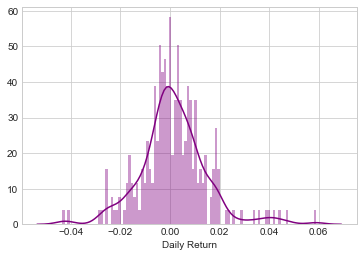

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

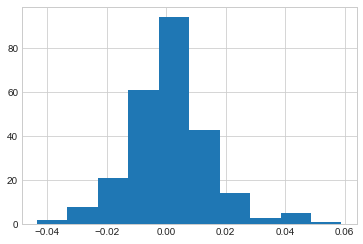

In [29]:
AAPL['Daily Return'].hist()

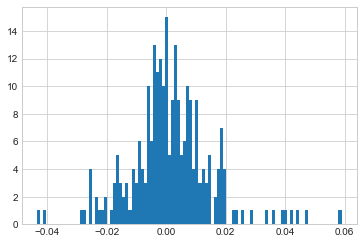

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [31]:
closing_df = web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-28,159.064911,946.020020,913.809998,71.540665
2017-08-29,160.483490,954.059998,921.289978,71.756775
2017-08-30,160.916916,967.590027,929.570007,72.699776
2017-08-31,161.557236,980.599976,939.330017,73.446312
2017-09-01,161.606491,978.250000,937.340027,72.631020


In [32]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-28,NaN,NaN,NaN,NaN
2017-08-29,0.008918,0.008499,0.008185,0.003021
2017-08-30,0.002701,0.014182,0.008987,0.013142
2017-08-31,0.003979,0.013446,0.010499,0.010269
2017-09-01,0.000305,-0.002396,-0.002119,-0.011101


In [33]:
MU = web.DataReader('MU', 'robinhood', start, end)

In [34]:
MU.head()

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
MU     2017-08-29   31.480000  31.530000         False  30.700000  30.750000   
       2017-08-30   31.610000  31.680000         False  31.380000  31.650000   
       2017-08-31   31.970000  32.020000         False  31.480000  31.610000   
       2017-09-01   32.600000  32.880000         False  32.130000  32.130000   
       2017-09-05   32.070000  32.740000         False  31.650000  32.450000   

                  session    volume  
symbol begins_at                     
MU     2017-08-29     reg  23151883  
       2017-08-30     reg  17467885  
       2017-08-31     reg  25693965  
       2017-09-01     reg  26034048  
       2017-09-05     reg  28866578

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


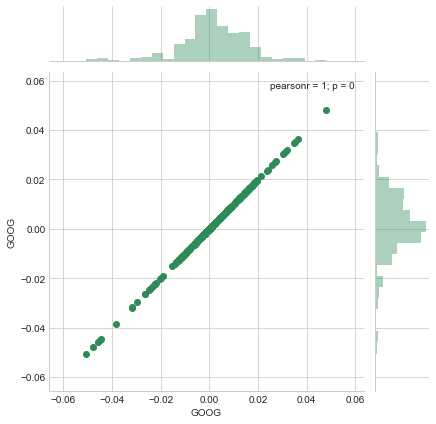

In [35]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')
# this is a linear relationship

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


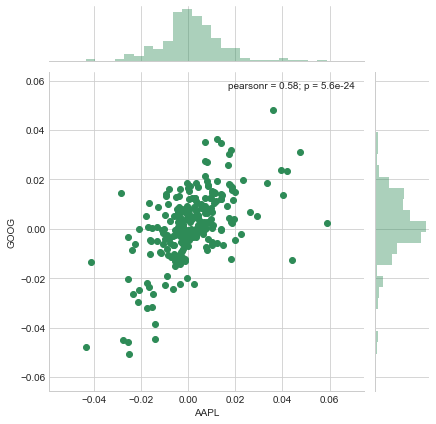

In [36]:
sns.jointplot('AAPL', 'GOOG', tech_rets, kind='scatter', color='seagreen')

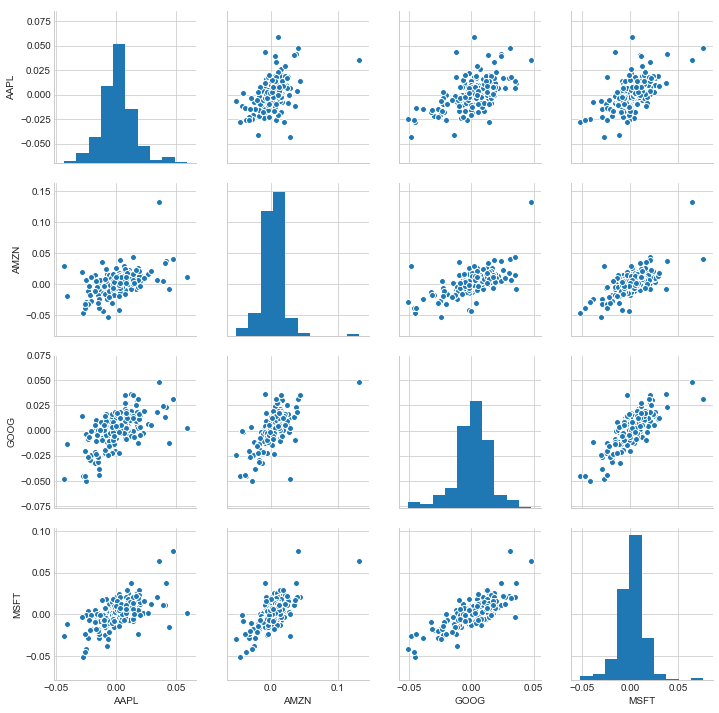

In [37]:
sns.pairplot(tech_rets.dropna())

/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


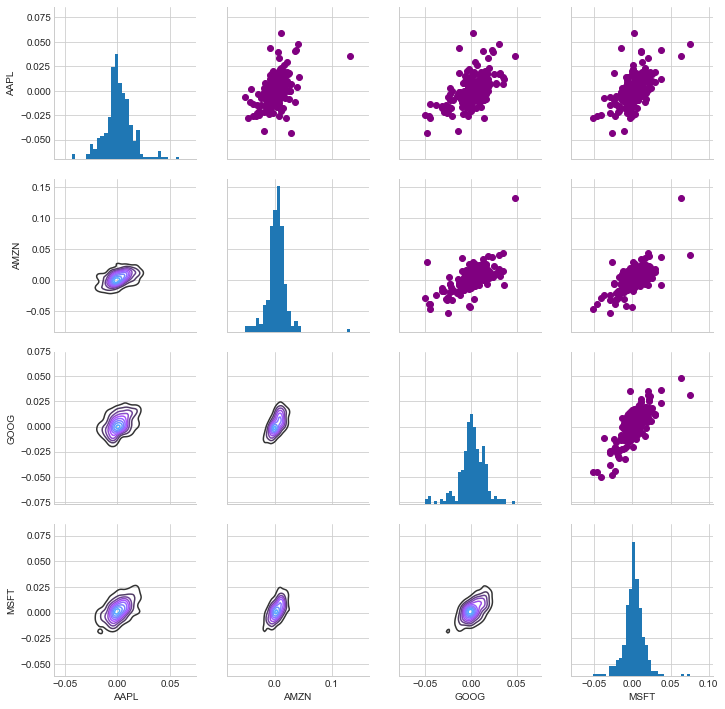

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

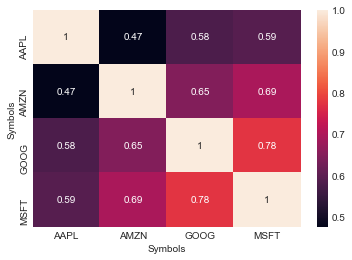

In [44]:
sns.heatmap(data = tech_rets.corr(), annot=True)

In [45]:
rets = tech_rets.dropna()

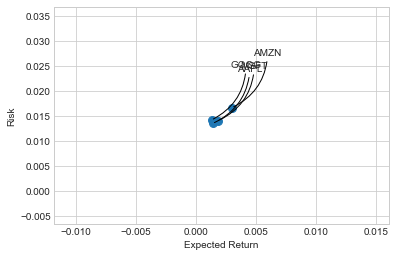

In [46]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3')
    )

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


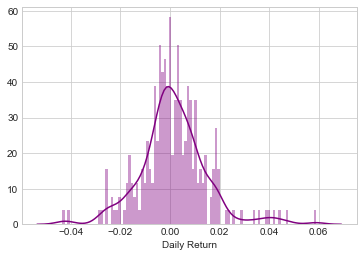

In [47]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [48]:
rets['AAPL'].quantile(0.05)

-0.020718530026279724

In [49]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [50]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [51]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-28,919.244995,911.869995,916.000000,913.809998,1086500,913.809998
2017-08-29,923.330017,905.000000,905.099976,921.289978,1185600,921.289978
2017-08-30,930.818970,919.650024,920.049988,929.570007,1301200,929.570007
2017-08-31,941.979980,931.760010,931.760010,939.330017,1582600,939.330017
2017-09-01,942.479980,935.150024,941.130005,937.340027,947400,937.340027


In [52]:
start_price = 540.74

Text(0.5,1,'Monte Carlo Analysis for Google')

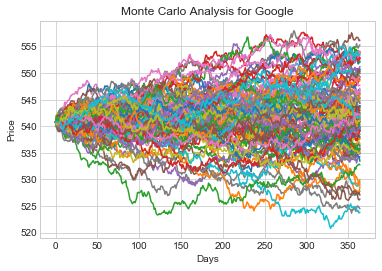

In [53]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')